In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)#不用科学计数法

In [12]:
def distance(row,central):
    sum_array=np.sum((row - central) ** 2)#免得计算第一行的索引
    return np.sqrt(sum_array)

In [13]:
def kmeans(train, k, epoch):
    # 随机初始化聚类中心
    np.random.seed(99)  #设置随机种子
    centroid_array=train[np.random.choice(train.shape[0], k, replace=False)]#根据随机种子抽取数据集中的三行 不放回抽取
    cluster_array=np.zeros(train.shape[0])#创建簇数组,分类结果添加进簇数组中
    distance_array=[]
    for cnt in range(epoch):
        # 计算每个样本到聚类中心的距离，并分配到最近的聚类中心
        for i, point in enumerate(train):#enumerate返回一个包含索引和值的元组,索引赋值给i,值元组赋值给point
            for centroid in centroid_array:
                distance_array.append(distance(point, centroid))
            cluster_array[i] = np.argmin(distance_array)#找到最小的中心点所代表的簇,并将该样本所在的簇数组位置,赋值成所分配的簇的代号
            distance_array.clear()#清空距离数组
        # 更新聚类中心为每个簇的平均值

        new_centroids = []#新聚类列表
        for i in range(k):#循环k次,k是那个簇的个数
            cluster_point_array = train[cluster_array == i]  #获取属于第i个簇的样本点
            centroid = np.mean(cluster_point_array, axis=0)  #计算该簇的均值作为新聚类中心,聚类中心有可能不是真实存在的点,只是一个计算出来的聚类中心,axis按列求平均
            new_centroids.append(centroid)#把聚类中心加到新聚类列表中,在每次新的大循环里面聚类列表都被清空过了
        new_centroids = np.array(new_centroids)
        #如果聚类中心没有变化,则跳出,表示聚类中心稳定下来了
        if np.all(centroid_array == new_centroids):
            break
        centroid_array = new_centroids#更新聚类中心点数组

    return centroid_array, cluster_array

In [14]:
data=pd.read_csv('iris.csv')
data=data.sample(frac=1).reset_index(drop=True)#随机打乱数据
null_values=data.isnull().sum()#检查一下有没有空值
print(null_values)
cols=data.shape[1]#划分数据集测试集
train=data.iloc[:, :-1]
train=train.values.astype(float)#转为numpy数组,并且转为float

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [15]:
#数据归一化
features=train[:, 1:]  #选择除了第一列id之外的所有列
train_min=np.min(features, axis=0)
train_max=np.max(features, axis=0)
features=(features-train_min)/(train_max-train_min)#映射到0-1之间,train_max是上限,train_min是下限
train=np.concatenate((train[:,0:1],features),axis=1)

In [16]:
k=3#分成三簇
epoch=150#最大迭代次数
centroid_array, cluster_array = kmeans(train, k,epoch)
print(centroid_array)#中心点
print(cluster_array)#画图的数据,簇的分类

[[ 74.5          0.45055556   0.325        0.54338983   0.50166667]
 [ 25.           0.19614512   0.59183673   0.07886544   0.06037415]
 [125.           0.63071895   0.40441176   0.7666999    0.79656863]]
[0. 2. 2. 2. 1. 1. 2. 1. 0. 2. 0. 2. 2. 2. 2. 0. 1. 1. 2. 2. 2. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 2. 0. 0. 2. 2. 1. 2. 2. 0. 1. 0. 2. 1. 2. 0. 2.
 2. 2. 1. 1. 0. 2. 0. 2. 2. 0. 1. 2. 1. 2. 1. 0. 0. 1. 2. 2. 0. 2. 0. 2.
 2. 1. 0. 0. 1. 1. 0. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 0. 0. 1. 0. 2.
 0. 1. 1. 2. 1. 2. 1. 0. 0. 2. 2. 0. 2. 1. 2. 0. 0. 1. 0. 2. 1. 0. 0. 2.
 1. 0. 1. 2. 2. 1. 2. 1. 0. 1. 0. 1. 1. 0. 2. 1. 1. 0. 1. 0. 2. 0. 0. 1.
 2. 2. 2. 1. 1. 1.]


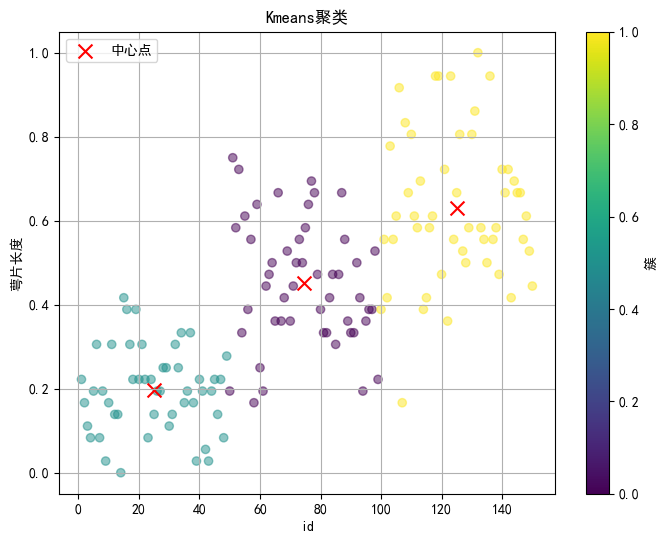

In [17]:
plt.rc("font", family='SimHei')
plt.figure(figsize=(8, 6))
plt.scatter(train[:, 0], train[:, 1], c=cluster_array, cmap='viridis', alpha=0.5)
plt.scatter(centroid_array[:, 0], centroid_array[:, 1], c='red', marker='x', s=100, label='中心点')
plt.title('Kmeans聚类')
plt.xlabel('id')
plt.ylabel('萼片长度')
plt.legend()
plt.colorbar(label='簇')
plt.grid(True)
plt.show()

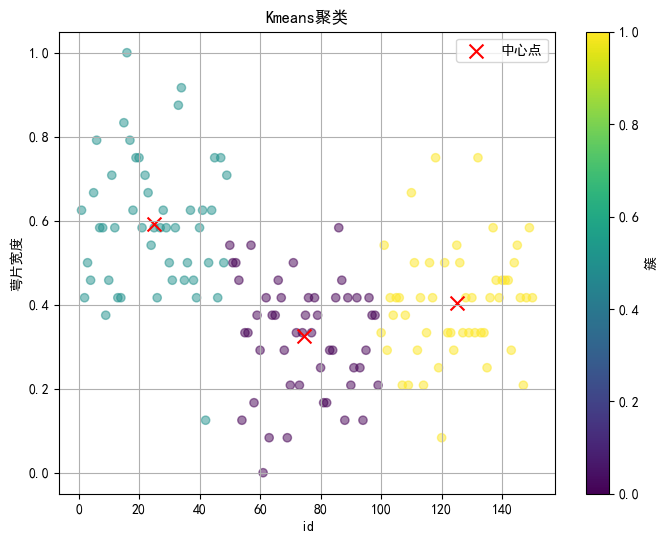

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(train[:, 0], train[:, 2], c=cluster_array, cmap='viridis', alpha=0.5)
plt.scatter(centroid_array[:, 0], centroid_array[:, 2], c='red', marker='x', s=100, label='中心点')
plt.title('Kmeans聚类')
plt.xlabel('id')
plt.ylabel('萼片宽度')
plt.legend()
plt.colorbar(label='簇')
plt.grid(True)
plt.show()

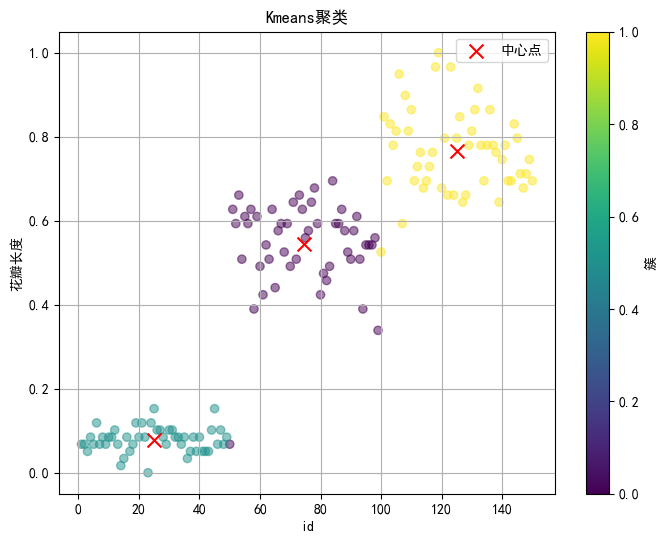

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(train[:, 0], train[:, 3], c=cluster_array, cmap='viridis', alpha=0.5)
plt.scatter(centroid_array[:, 0], centroid_array[:, 3], c='red', marker='x', s=100, label='中心点')
plt.title('Kmeans聚类')
plt.xlabel('id')
plt.ylabel('花瓣长度')
plt.legend()
plt.colorbar(label='簇')
plt.grid(True)
plt.show()

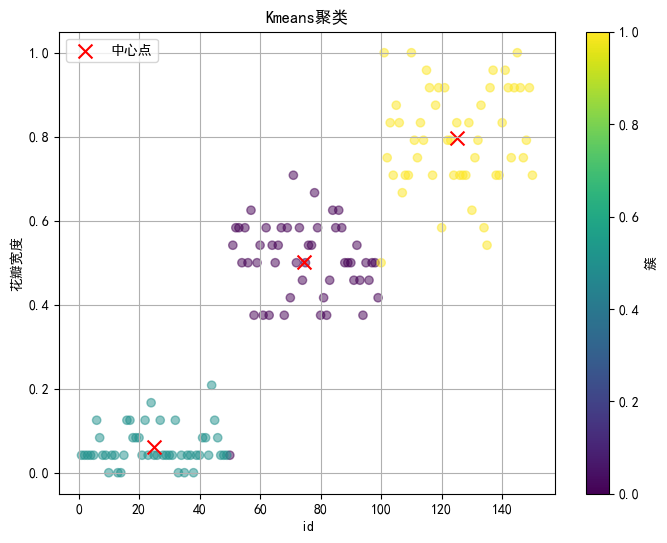

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(train[:, 0], train[:, 4], c=cluster_array, cmap='viridis', alpha=0.5)
plt.scatter(centroid_array[:, 0], centroid_array[:, 4], c='red', marker='x', s=100, label='中心点')
plt.title('Kmeans聚类')
plt.xlabel('id')
plt.ylabel('花瓣宽度')
plt.legend()
plt.colorbar(label='簇')
plt.grid(True)
plt.show()